### ML/DL HW3 - Data Analysis with NYC Taxi dataset

1. Copy this notebook and solve them by following the instruction.
2. Upload the dataset in your directory before executing this code.
  * Train data (71,514 rows; 2023/01/01-2023/01/23): [Download](https://drive.google.com/file/d/15Ne57MIFPFYgDMpbL5kOly9CjAoZe19r/view?usp=sharing)
  * Test data (28,390 rows; 2023/01/24-2023/01/31): [Download](https://drive.google.com/file/d/15Mi8vm2guvePB7RaY6LPi3fxXOwLFlyw/view?usp=sharing)
  * LocationID csv data : [Download](https://github.com/TanmayKedari/Exploratory-Analysis-of-NYC-Taxi/blob/master/taxi_zones.csv)

3. Note: Your code for all of the programming exercises including this one should be submitted to the corresponding Programming submission slot on Gradescope.

4. Note: You can change the structure of the code or change the logic as needed.

Reference
* https://github.com/TanmayKedari/Exploratory-Analysis-of-NYC-Taxi/blob/master/NYC%20Taxi%20Trip%20Duration.ipynb


### 1. Setup environment and upload dataset files
Install the required libraries. Also, upload New York taxi data files to Colab.

In [149]:
!pip install pandas pyarrow
import numpy as np
import pandas as pd
from google.colab import files
files=files.upload()

Saving taxi_zones.csv to taxi_zones (1).csv
Saving yellow_tripdata_2023-01_small_test.parquet to yellow_tripdata_2023-01_small_test (1).parquet
Saving yellow_tripdata_2023-01_small_train.parquet to yellow_tripdata_2023-01_small_train (1).parquet


In [150]:
import pyarrow.parquet as pq
df_train = pq.read_table('./yellow_tripdata_2023-01_small_train.parquet').to_pandas()
df_test = pq.read_table('./yellow_tripdata_2023-01_small_test.parquet').to_pandas()

In [151]:
df_train.tail(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
71509,2,2023-01-23 23:13:59,2023-01-23 23:36:04,1.0,10.48,1.0,N,70,61,2,42.2,1.0,0.5,0.00,0.00,1.0,45.95,0.0,1.25
71510,2,2023-01-23 23:57:55,2023-01-24 00:37:38,1.0,17.65,2.0,N,132,163,1,70.0,0.0,0.5,22.20,0.00,1.0,97.45,2.5,1.25
71511,2,2023-01-23 23:24:38,2023-01-23 23:48:41,1.0,12.12,1.0,N,70,142,1,47.8,6.0,0.5,13.12,6.55,1.0,78.72,2.5,1.25
71512,2,2023-01-23 23:04:04,2023-01-23 23:12:30,1.0,1.64,1.0,N,68,163,2,10.7,1.0,0.5,0.00,0.00,1.0,15.70,2.5,0.00
71513,2,2023-01-23 23:59:02,2023-01-24 00:12:46,1.0,4.03,1.0,N,43,68,2,19.1,1.0,0.5,0.00,0.00,1.0,24.10,2.5,0.00


In [152]:
df_test.tail(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
28385,1,2023-01-31 22:32:00,2023-01-31 22:49:41,NaN,0.00,NaN,None,144,143,0,13.00,1.0,0.5,0.00,0.0,1.0,20.00,NaN,NaN
28386,2,2023-01-31 22:27:39,2023-01-31 22:45:27,NaN,4.56,NaN,None,186,238,0,20.00,0.0,0.5,4.80,0.0,1.0,28.80,NaN,NaN
28387,2,2023-01-31 22:40:00,2023-01-31 22:58:00,NaN,4.34,NaN,None,68,236,0,20.88,0.0,0.5,2.49,0.0,1.0,27.37,NaN,NaN
28388,1,2023-01-31 23:18:36,2023-01-31 23:27:44,NaN,0.00,NaN,None,48,229,0,3.90,0.0,0.5,0.00,0.0,1.0,7.90,NaN,NaN
28389,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,15.80,0.0,0.5,3.96,0.0,1.0,23.76,NaN,NaN


In [153]:
taxi_zones = pd.read_csv('taxi_zones.csv')
print(len(taxi_zones))
taxi_zones.tail(5)
# LocationID = PULocationID = DOLocationID (264, 265 = Unknown)

263


,X,Y,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,Latitude,Longitude
258,1.023962e+06,266878.034018,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx,42.307797,-96.930286
259,1.010930e+06,211369.883417,260,0.133514,0.000422,Woodside,260,Queens,37.429939,-122.253856
260,9.806682e+05,197575.689861,261,0.027120,0.000034,World Trade Center,261,Manhattan,36.375484,-81.758240
261,9.992531e+05,222193.818758,262,0.049064,0.000122,Yorkville East,262,Manhattan,43.112850,-75.271000
262,9.977632e+05,222907.634704,263,0.037017,0.000066,Yorkville West,263,Manhattan,31.759903,-97.102936


### 2.1. Calculate and assign new columns to the dataframe [3 pts]
Make weekday, month and pickup_hour which will help us to gain more insights from the data.

In [154]:
# Change to 'datetime' data type
df_train['tpep_pickup_datetime'] = pd.to_datetime(df_train['tpep_pickup_datetime'])
df_train['tpep_dropoff_datetime'] = pd.to_datetime(df_train['tpep_dropoff_datetime'])

# Calculate and assign new columns to the dataframe such as weekday, month, pickup_hour,
# weekday_num, and trip_duration which will help us gain more insights from the data.
df_train['weekday'] = df_train['tpep_pickup_datetime'].dt.strftime('%A')
df_train['month'] = df_train['tpep_pickup_datetime'].dt.strftime('%B')
df_train['weekday_num'] = df_train['tpep_pickup_datetime'].dt.weekday  #0 is Monday
df_train['month_num'] = df_train['tpep_pickup_datetime'].dt.month #1 is January
df_train['pickup_hour'] = df_train['tpep_pickup_datetime'].dt.hour
df_train['trip_duration'] = (df_train['tpep_dropoff_datetime'] - df_train['tpep_pickup_datetime']).dt.total_seconds()

### 2.2 Match places by latitude and longitude [2 pts]

---


Convert the IDs of the boarding and alighting locations to latitude and longitude through the given csv file.

In [156]:
# Create dictionaries to map LocationID to latitude and longitude
location_to_latitude = dict(zip(taxi_zones['LocationID'], taxi_zones['Latitude']))
location_to_longitude = dict(zip(taxi_zones['LocationID'], taxi_zones['Longitude']))

df_train['PU_longitude'] = df_train['PULocationID'].map(location_to_longitude)
df_train['PU_latitude'] = df_train['PULocationID'].map(location_to_latitude)

df_train['DO_longitude'] = df_train['DOLocationID'].map(location_to_longitude)
df_train['DO_latitude'] = df_train['DOLocationID'].map(location_to_latitude)

### 2.3. Analysis of trip duration and pickup hour [2 pts]

Trip duration is analyzed based on pickup hour. Draw a graph by averaging the trip duration for each pickup hour. \
You can use any library (e.g., seaborn, matplot, pandas, etc) for this part.

(Example)
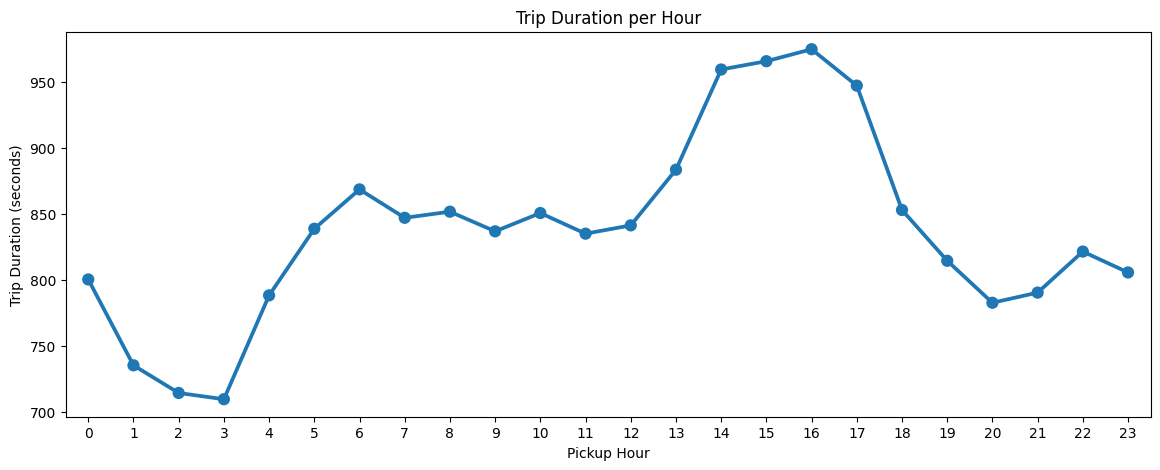

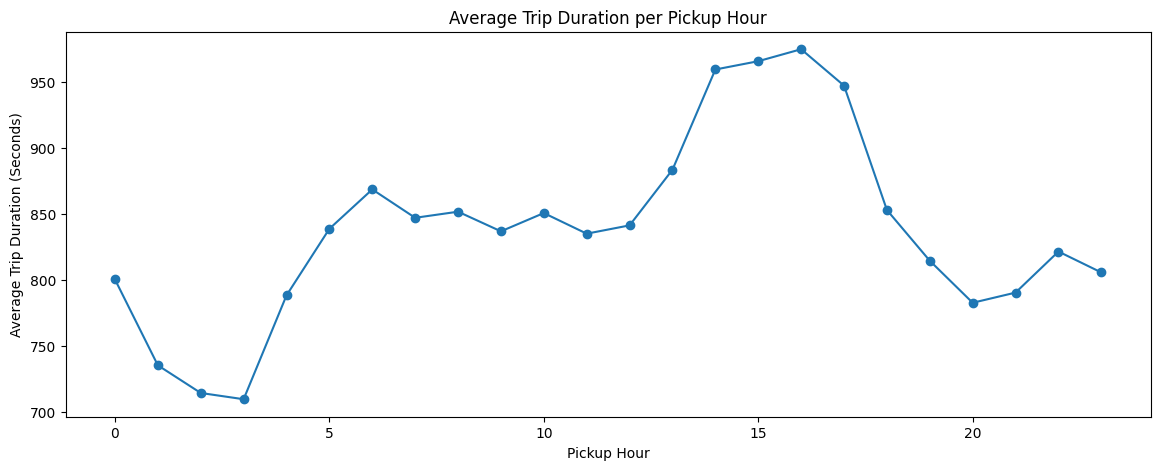

In [157]:
import matplotlib.pyplot as plt

# Group the data by pickup hour and calculate the mean trip duration for each hour
group1 = df_train.groupby('pickup_hour')['trip_duration'].mean().reset_index()

# Create the plot
plt.figure(figsize=(14, 5))
plt.plot(group1['pickup_hour'], group1['trip_duration'], marker='o')
plt.title('Average Trip Duration per Pickup Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Average Trip Duration (Seconds)')
plt.show()

### 2.4. Analysis of trip duration and weekday [2 pts]

Trip duration is analyzed based on what time you boarded. Draw a graph by averaging the trip duration for each weekday. \
You can use (e.g., seaborn, matplot, pandas, etc) for this part.

(Example)
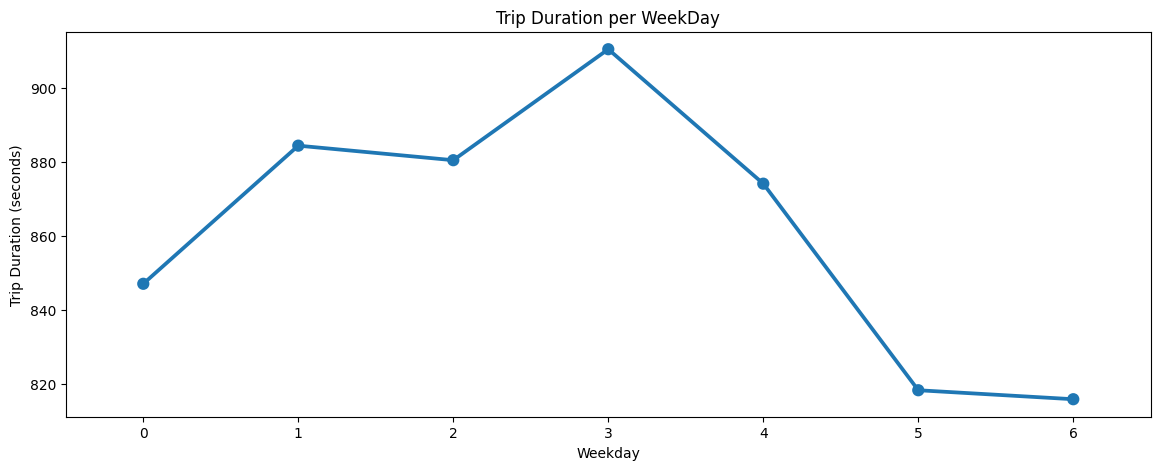

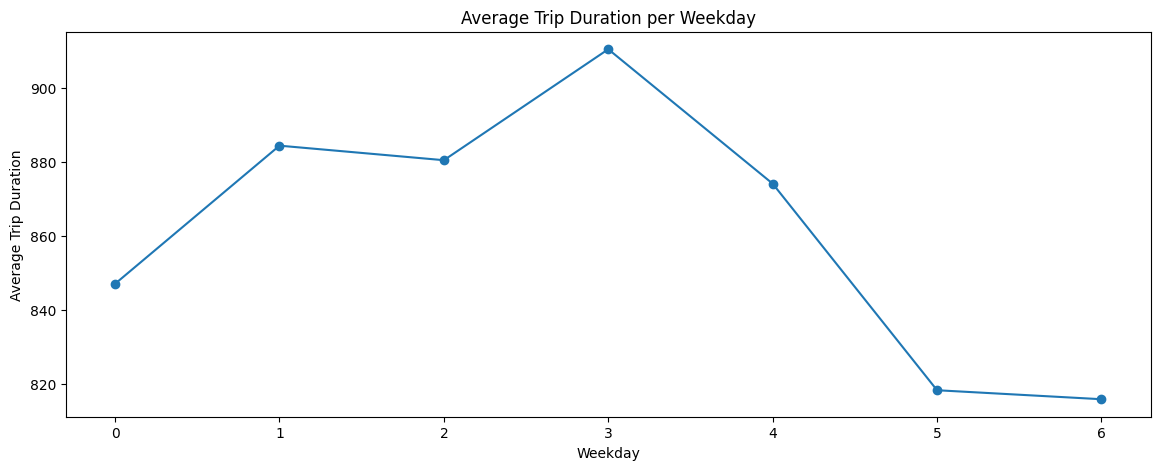

In [158]:
import matplotlib.pyplot as plt

# Group the data by weekday and calculate the mean trip duration for each day
group2 = df_train.groupby('weekday_num')['trip_duration'].mean().reset_index()

# Create the plot
plt.figure(figsize=(14, 5))
plt.plot(group2['weekday_num'], group2['trip_duration'], marker='o')
plt.title('Average Trip Duration per Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Trip Duration')
plt.show()

### 2.5 Visualize pick-up points and drop-off points [3 pts]
Visualize each pick-up points and drop-off points. The x-axis is longitude, and the y-axis is latitude. You can use any library including matplotlib.

(Example visualization)


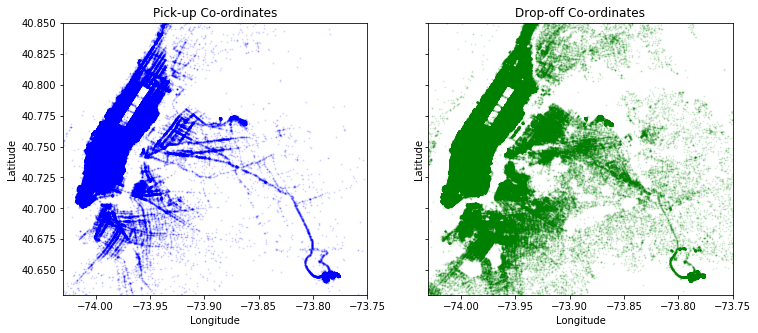

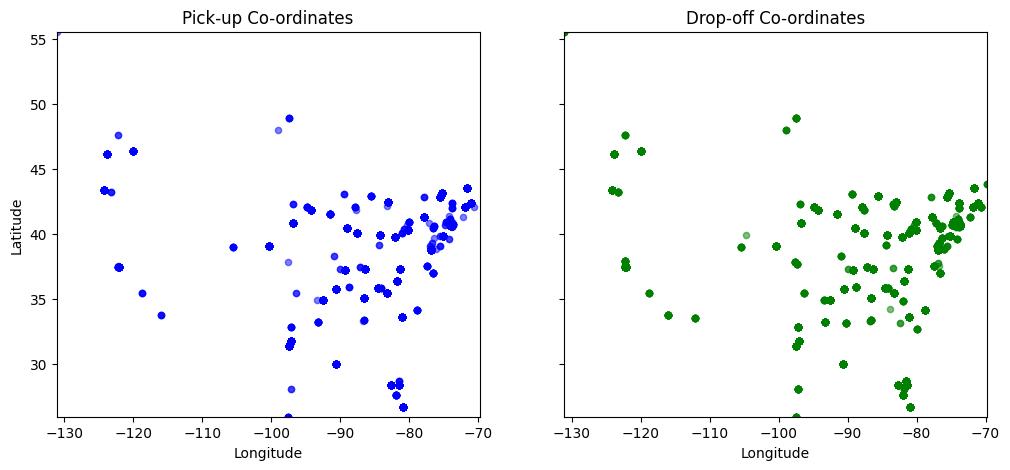

In [161]:
import matplotlib.pyplot as plt

city_long_border = (min(df_train['PU_longitude'].min(), df_train['DO_longitude'].min()), max(df_train['PU_longitude'].max(), df_train['DO_longitude'].max()))
city_lat_border = (min(df_train['PU_latitude'].min(), df_train['DO_latitude'].min()), max(df_train['PU_latitude'].max(), df_train['DO_latitude'].max()))
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(12, 5))

# Plot pickup points
ax[0].scatter(df_train['PU_longitude'], df_train['PU_latitude'], color='blue', s=20, alpha=0.5)
ax[0].set_xlim(city_long_border)
ax[0].set_ylim(city_lat_border)
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')
ax[0].set_title('Pick-up Co-ordinates')

# Plot drop-off points
ax[1].scatter(df_train['DO_longitude'], df_train['DO_latitude'], color='green', s=20, alpha=0.5)
ax[1].set_xlim(city_long_border)
ax[1].set_ylim(city_lat_border)
ax[1].set_xlabel('Longitude')
ax[1].set_title('Drop-off Co-ordinates')

plt.show()

### 3.1 Make dataet & preprocessing [2 pts]
Write a code to make dataset. You can use preprocessing as needed.



In [162]:
# Check the below cells before fill in your code.

import pyarrow.parquet as pq
from sklearn.impute import SimpleImputer

class Dataset:
  train_x = None # X (data) of training set.
  train_y = None  # Y (label) of training set.
  test_x = None # X (data) of test set.
  test_y = None # Y (label) of test set.

  def __init__(self, features):
    self.features = features
    self.taxi_zones = pd.read_csv('taxi_zones.csv')
    location_to_latitude = dict(zip(self.taxi_zones['LocationID'], self.taxi_zones['Latitude']))
    location_to_longitude = dict(zip(self.taxi_zones['LocationID'], self.taxi_zones['Longitude']))

    df_train = pq.read_table('./yellow_tripdata_2023-01_small_train.parquet').to_pandas()
    df_train['pickup_hour'] = df_train['tpep_pickup_datetime'].dt.hour
    df_train['weekday_num'] = df_train['tpep_pickup_datetime'].dt.weekday  #0 is Monday
    df_train['PU_longitude'] = df_train['PULocationID'].map(location_to_longitude)
    df_train['PU_latitude'] = df_train['PULocationID'].map(location_to_latitude)
    df_train['DO_longitude'] = df_train['DOLocationID'].map(location_to_longitude)
    df_train['DO_latitude'] = df_train['DOLocationID'].map(location_to_latitude)

    df_test = pq.read_table('./yellow_tripdata_2023-01_small_test.parquet').to_pandas()
    df_test['pickup_hour'] = df_test['tpep_pickup_datetime'].dt.hour
    df_test['weekday_num'] = df_test['tpep_pickup_datetime'].dt.weekday  #0 is Monday
    df_test['PU_longitude'] = df_test['PULocationID'].map(location_to_longitude)
    df_test['PU_latitude'] = df_test['PULocationID'].map(location_to_latitude)
    df_test['DO_longitude'] = df_test['DOLocationID'].map(location_to_longitude)
    df_test['DO_latitude'] = df_test['DOLocationID'].map(location_to_latitude)

    self.df_train = df_train
    self.df_test = df_test
    self.df_train = self.preprocess_data(self.df_train)
    self.df_test = self.preprocess_data(self.df_test)

  def preprocess_data(self, df):
    ### TODO: Preprocess your data, use your preprocessing code above (Impute null values; DO NOT drop any test cases)
    imputer = SimpleImputer(strategy='mean')
    df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds()
    for feature in self.features:
            df[feature] = imputer.fit_transform(df[[feature]])
    return df

  def getdata_linear_reg(self):
    ### Hint: Use self.df_train, self.df_test
    ### Three features (x): Passenger_count, trip_distance, trip_duration (seconds; use tpep_pickup_datetime, tpep_dropoff_datetime)
    ### Target (y): fare_amount
    self.train_x = self.df_train[self.features]
    self.train_y = self.df_train['fare_amount']
    self.test_x = self.df_test[self.features]
    self.test_y = self.df_test['fare_amount']
    return [self.train_x, self.train_y, self.test_x, self.test_y]

  def correlation(self, X, Y):
    ### TODO: Correlation with each features - Optional: it may or may not need for this HW.
    return X.corrwith(Y)

### 3.2 Make Multiple Linear Regression model [3 pts]

In [163]:
# Write a code to make Multiple Linear Regression model and analyze your results.

### TODO: YOUR CODE HERE
features = ['passenger_count', 'trip_distance', 'trip_duration']
dataset = Dataset(features)
dataset.preprocess_data(dataset.df_train)
dataset.preprocess_data(dataset.df_test)
train_x, train_y, test_x, test_y = dataset.getdata_linear_reg()

from sklearn.linear_model import LinearRegression
lrModel = LinearRegression()
lrModel.fit(train_x, train_y)

print("Model")
print("Intercept:", lrModel.intercept_)
print("Coef:", lrModel.coef_)

Model
Intercept: 3.7073863605338424
Coef: [0.11415376 2.92476095 0.00525156]


In [164]:
from sklearn.metrics import mean_squared_error, r2_score

pred = lrModel.predict(test_x)
mse = mean_squared_error(test_y, pred)
r2 = r2_score(test_y, pred)

print("Model Score")
print("MSE:", mse)
print("R2:", r2)

Model Score
MSE: 44.86831234018166
R2: 0.8296093699514828


### 3.3 Backward stepwise selection with validation [7 pts]

*   We use backward stepwise selection to analyze the impact of each feature on linear regression.
*   Each model measures the error by including all features but excluding one feature.
*   The features to be used for linear regression model training are "PU_longitude", "PU_latitude", "DO_longitude", "DO_latitude", “pickup hour”, “weekday”, and “trip duration”. The value to predict is "fare_amount".
*   We make validation set to search for one feature to remove.
*   The train dataset is divided into 4 parts, 75% is used for training, and 25% is used for validation.
*   Compare the results of Multiple Linear Regression models with one feature removed.



In [167]:
# Write a code to use validation set to find a less important feature, then analyze your results.

### TODO: YOUR CODE HERE
### TODO: YOUR CODE HERE
features = ['PU_longitude', 'PU_latitude', 'DO_longitude', 'DO_latitude', 'pickup_hour', 'weekday_num', 'trip_duration']
dataset = Dataset(features)
dataset.preprocess_data(dataset.df_train)
dataset.preprocess_data(dataset.df_test)
train_x, train_y, test_x, test_y = dataset.getdata_linear_reg()

from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(train_x[features], train_y, test_size=0.25, random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_x, train_y)
all_feature_pred = model.predict(val_x)
all_feature_mse = mean_squared_error(val_y, all_feature_pred)
print("MSE with all features:", all_feature_mse)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

remove_feature = None
min_mse = float('inf')
features = ['PU_longitude', 'PU_latitude', 'DO_longitude', 'DO_latitude', 'pickup_hour', 'weekday_num', 'trip_duration']
for feature in features:
    train_x_removed = train_x.drop(columns=[feature])
    val_x_removed = val_x.drop(columns=[feature])

    model = LinearRegression()
    model.fit(train_x_removed, train_y)
    pred = model.predict(val_x_removed)
    mse = mean_squared_error(val_y, pred)
    print("MSE without " + feature + ": ", all_feature_mse)

    if mse < min_mse:
        min_mse = mse
        remove_feature = feature

print("Remove Feature:", remove_feature)
print("Min MSE:", min_mse)

MSE with all features: 115.27655985254505
MSE without PU_longitude:  115.27655985254505
MSE without PU_latitude:  115.27655985254505
MSE without DO_longitude:  115.27655985254505
MSE without DO_latitude:  115.27655985254505
MSE without pickup_hour:  115.27655985254505
MSE without weekday_num:  115.27655985254505
MSE without trip_duration:  115.27655985254505
Remove Feature: weekday_num
Min MSE: 115.26447255579252


### 4. Multiple Linear regression with L1, L2 regularization [6 pts]



1.   Apply regularization to multiple linear regression models.
  *   Create a model using L1 and L2 regularization, respectively.
  *   The features to be used for linear regression model training are "PU_longitude", "PU_latitude", "DO_longitude", "DO_latitude", “pickup hour”, “weekday”, and “trip duration”.
  *   The value to predict is "fare_amount".

2.   Compare it to the basic multiple linear regression model without L1 and L2 regularization.


In [196]:
# Do a multiple linear regression with L1, L2 regularization, then analyze your results.

### TODO: YOUR CODE HERE
### TODO: YOUR CODE HERE
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

features = ['PU_longitude', 'PU_latitude', 'DO_longitude', 'DO_latitude', 'pickup_hour', 'weekday_num', 'trip_duration']
dataset = Dataset(features)
dataset.preprocess_data(dataset.df_train)
dataset.preprocess_data(dataset.df_test)
train_x, train_y, test_x, test_y = dataset.getdata_linear_reg()

# L1 Regularization (Lasso)
lassoModel = Lasso(alpha=1)
lassoModel.fit(train_x, train_y)
lassoPred = lassoModel.predict(test_x)

lassoMse = mean_squared_error(test_y, lassoPred)
lassoR2 = r2_score(test_y, lassoPred)

print("L1 Regularization")
print("MSE:", lassoMse)
print("R2:", lassoR2)
print()

# L2 Regularization (Ridge)
ridgeModel = Ridge(alpha=1)
ridgeModel.fit(train_x, train_y)
ridgePred = ridgeModel.predict(test_x)

ridgeMse = mean_squared_error(test_y, ridgePred)
ridgeR2 = r2_score(test_y, ridgePred)

print("L2 Regularization (Ridge)")
print("MSE:", ridgeMse)
print("R2:", ridgeR2)

L1 Regularization
MSE: 95.4901914246267
R2: 0.6373691580611436

L2 Regularization (Ridge)
MSE: 95.24271891340351
R2: 0.6383089526490769


In [197]:
# Compare with basic multiple linear regression model

### TODO: YOUR CODE HERE
### TODO: YOUR CODE HERE

# Basic Multiple Linear Regression
lrModel = LinearRegression()
lrModel.fit(train_x, train_y)
lrPred = lrModel.predict(test_x)

lrMse = mean_squared_error(test_y, lrPred)
lrR2 = r2_score(test_y, lrPred)

print("Basic Multiple Linear Regression")
print("MSE:", lrMse)
print("R2:", lrR2)
print()

print("L1 Regularization")
print("MSE:", lassoMse)
print("R2:", lassoR2)
print()

print("L2 Regularization (Ridge)")
print("MSE:", ridgeMse)
print("R2:", ridgeR2)

Basic Multiple Linear Regression
MSE: 95.24271864244604
R2: 0.6383089536780574

L1 Regularization
MSE: 95.4901914246267
R2: 0.6373691580611436

L2 Regularization (Ridge)
MSE: 95.24271891340351
R2: 0.6383089526490769
